## 损失函数

在我们利用数据来寻找最优参数的过程中,我们这里就需要思考,什么才叫最优参数呢? 如何来评价我们寻找到个参数是最优参数呢?

这个时候我们的损失函数就出现了,通过损失函数计算的这个指标就可以对我们的模型作出一个合理判断,判断目前模型"性能有多好","误差有多大". 通过这个指标再反向给该模型的参数调整提供一个方向.

目前较为常见的两个损失函数:
- 均方误差(mean squared error)
- 交叉熵误差(cross entropy error)

### 均方误差(mean squared error)

均方误差(mean squared error)是我们最为常见的一种方法,具体函数如下:  

$E = \frac12 \sum_k(y_k - t_k)^2$

公式符号表示:
- $y_k$ 表示模型的输出
- $t_k$ 表示实际数据的值
- $k$表示数据的维度,比如手写字符:10个元素,$k=10$

所以这里的均方误差计算的是:神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和

例如:

In [1]:
# 神经网络的输出 y 是 softmax 函数的输出。由于 softmax 函数的输出可以理解为概率
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 将正确解标签设为 1，其他均设为 0
# 。将正确解标签表示为 1，其他标签表示为 0 的表示方法称为 one-hot 表示
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 均方误差
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

### 交叉熵误差（cross entropy error）

其公式如下：  
$E = - \sum_kt_klogy_k$
公式说明：
- log:是以e为底的自然对数$log_e$
- $y_k$:是神经网络的输出
- $t_k$:是正确解的标签，用one-hot表示
所以可以看出上面的公式只计算正确解的标签的输出的自然对数，因为其他非正确解的标签都是0.
例如，0-9的字符表示为2的标签如下：
[0,0,1,0,0,0,0,0,0,0],只有index = 2时为1，其他的为零，带入到公式中，就可以看到这样的场景，只计算$logy_2$

下面来看看log的图像，


d:\program files\python35\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
d:\program files\python35\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


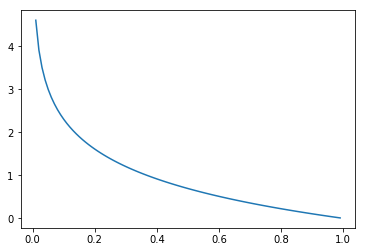

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0,1,0.01)
y = np.log(x)
y2 = -np.log(x)

#plt.plot(x,y)
plt.plot(x,y2)


通过上面的图我们可以发现，为什么这个函数也适合做损失函数。因为当我们的预测结果越接近1的时候，loss值会变小。
当我们的预测结果越接近0的时候，loss值会变大。这个正好和我们的需要预测方向吻合。
所以现在交叉熵的损失函数可以实现如下：


In [17]:
def cross_entropy_error(y,t):
    """
    y: 是预测值
    t: 标签值
    """
    delta = 1e-7 # 为了防止y=0的情况
    return -np.sum(t*np.log(y+delta))

In [19]:
# 测试softmax的预测值：
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y),np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


### mini_batch 学习

上面我们提到了两个不同的损失函数，而且我们这里也比较偏向于使用交叉熵损失函数作为未来机器学习模型的训练。这里我训练的目的就是为了是的损失函数最小。

上面的损失函数都是针对单个训练数据设定的，这里我们由于机器学习都是大量的数据，我们需要对更多的数据来计算损失函数，这是我们就要计算所有的训练数据的loss值，作为学习指标。  
所以我们的的损失函数应该定义如下：  
$E = - \frac1N\sum_n\sum_kt_{nk}logy_{nk}$

- N：表示数据的个数
- $t_{nk}$：表示第n个数据的第k个元素的标签数据值
- 上面的公式计算的是一个平均的值

这里有一个问题，如果将所有的数据作为损失值来计算，当数据量大的时候，这种方式会比较费时间，这里我们提出一种mini-batch的方案，就是从训练数据选择一小批量来进行计算。
例如，手写数字识别的案例，从60000个样本随机选取100个数据。

**np.random.choice(60000, 10)** 
从 0 到 59999 之间随机选择 10 个数字



In [5]:
import sys,os
sys.path.append(os.pardir)
import numpy as np

from dataset.mnist import load_mnist

(x_train,y_train),(x_test,y_test) = \
    load_mnist(normalize=True,one_hot_label=True)

print(x_train.shape)
print(y_train.shape)

train_size = len(x_train)
print(train_size)
batch_size = 10
batch_mask = np.random.choice(train_size,
                               batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]


(60000, 784)
(60000, 10)
60000
[ 3970 47964 26932 58891  1320 30954 34316 33800 34669 21858]


#### mini-batch 版交叉熵误差的实现

上面哪个交叉熵的函数只针对单个的训练数据，这里我们需要处理batch个数据，所以函数如下：

In [6]:
def cross_entropy_error(y,t):
    # 这里引入reshape变换
    #为了方便计算batch_size的输入
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size


In [ ]:
# 针对，当监督数据是标签形式（非 one-hot 表示）
def cross_entropy_erros(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    # np.log( y[np.arange(batch_size), t])。np.arange (batch_size) 会生成一个从 0 到 batch_size-1 的数组。比如
#当 batch_size 为 5 时，np.arange(batch_size) 会生成一个 NumPy 数组
#[0, 1, 2, 3, 4]。因为 t 中标签是以 [2, 7, 0, 9, 4] 的形式存储的，所以
#y[np.arange(batch_size), t=[y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]）
    return -np.sum(np.log(y[np.arange(batch_size),t]
                           + 1e-7))/batch_size